##### The main goal:

*   1 Normalization

*   2 Create a simple MLP in pytorch

*   3 Creation of Activation Functions

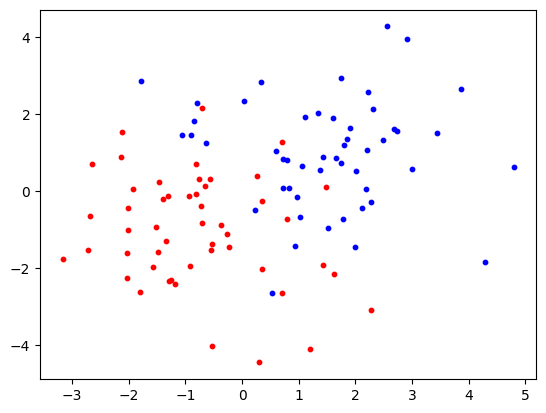

In [1]:
# Create own dataset
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

centers = [(-1, -1), (1, 1)]
cluster_std = [1.5, 1.5]

X, y = make_blobs(n_samples=100, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=10, label="Cluster2")


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

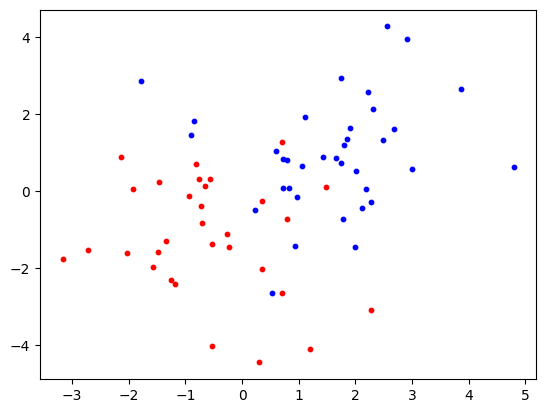

In [3]:
# train dataset scatter plot graph
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color="blue", s=10, label="Cluster2")


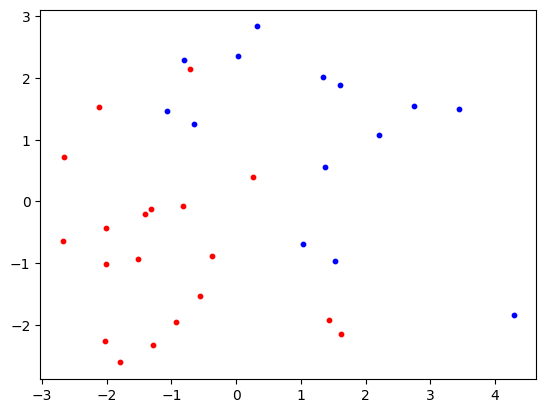

In [4]:
# Test dataset scatter plot graph
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color="red", s=10, label="Cluster1")
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color="blue", s=10, label="Cluster2")

#### Step 1: Normalize the data by using the following formula:

$$X_{train} = \frac{X_{train} - \bar{X}_{train}}{\sigma_{X_{train}}}$$

$$X_{test} = \frac{X_{test} - \bar{X}_{train}}{\sigma_{X_{train}}}$$

In [5]:
print("STD before normalization:")
print("X_train: ", X_train.std(axis=0))
print("X_test: ", X_test.std(axis=0))

STD before normalization:
X_train:  [1.63869787 1.79957369]
X_test:  [1.76751798 1.59554563]


In [6]:
# Normalize X_train
X_train_norm = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0) 

# Normalize X_test
X_test_norm = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

`axis=0` calculates the mean/std for each column across all rows (features' means).

`axis=1` calculates the mean/std for each row across the columns (each sample’s mean).

In [7]:
print("STD after normalizatio:")
print("X_train: ", X_train_norm.std(axis=0))
print("X_test: ", X_test_norm.std(axis=0))

STD after normalizatio:
X_train:  [1. 1.]
X_test:  [1. 1.]


In [ ]:
import torch # Pytouch
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)

X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor) 
test_dataset = TensorDataset(X_test_tensor, y_test_tensor) 

# Create DataLoader 
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) 

In [12]:
# Properties of train and test datasets
print("Properties of train/test datasets:")
print("Train dataset length:", len(train_dataset))
print("First element of train dataset:", train_dataset[0])
print("Test dataset length:", len(test_dataset))
print("First element of test dataset:", test_dataset[0])

# Properties of train and test loader
print("\nProperties of loaders:")
print("Number of batches in train loader:", len(train_loader))
print("Batch size in train loader:", train_loader.batch_size)
print("Number of batches in test loader:", len(test_loader))
print("Batch size in test loader:", test_loader.batch_size)


Properties of train/test datasets:
Train dataset length: 67
First element of train dataset: (tensor([-0.8451,  1.8258]), tensor(1))
Test dataset length: 33
First element of test dataset: (tensor([-1.4018, -0.2045]), tensor(0))

Properties of loaders:
Number of batches in train loader: 9
Batch size in train loader: 8
Number of batches in test loader: 5
Batch size in test loader: 8


#### Step 2: initialize MLP class. 
The MLP have the following parameters:

*   Layer 1 (input layer): input 2, output 64
*   RELU
*   Layer 2 (hidden layer): input 64, output 32
*   RELU
*   Layer 3 (output layer): input 32, output 2

In [ ]:
import torch.nn as nn
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(2, 64) 
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x

model = MLP().to(device)
 
print(model)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP().to(device)

MLP(
  (layer1): Linear(in_features=2, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=2, bias=True)
  (relu): ReLU()
)


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 
criterion = nn.CrossEntropyLoss()

# Properties of optimizer and criterion
print("Properties of optimizer and criterion:")
print("Optimizer:", optimizer)
print("Criterion:", criterion)

Properties of optimizer and criterion:
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Criterion: CrossEntropyLoss()


In [22]:
# Training Model
num_epochs = 10
logs = []
for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0

  for inputs, labels in train_loader:
      inputs, labels = inputs.to(device), labels.to(device) #move to GPU if avail
      optimizer.zero_grad() #zero the peremeter gradients
      outputs = model(inputs) #forward pass: compute predicted y by passing x to the model
      loss = criterion(outputs, labels) #compute loss
      loss.backward #backward pass: compute gradient of the loss w/ respect to model parameters
      optimizer.step() #update model parameters
      running_loss += loss.item() #log the loss

      epoch_loss = running_loss / len(train_loader)

  if epoch % 1 == 0:
      print(f"Epoch [{epoch}/{num_epochs}], Loss: {epoch_loss:.4f}")
      logs.append({'epoch': epoch, 'loss': epoch_loss})

Epoch [0/10], Loss: 0.7442
Epoch [1/10], Loss: 0.7391
Epoch [2/10], Loss: 0.7457
Epoch [3/10], Loss: 0.7629
Epoch [4/10], Loss: 0.7354
Epoch [5/10], Loss: 0.7442
Epoch [6/10], Loss: 0.7385
Epoch [7/10], Loss: 0.7452
Epoch [8/10], Loss: 0.7416
Epoch [9/10], Loss: 0.7307


In [23]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

mlp_accuracy = correct / total
print(f'Test Accuracy: {mlp_accuracy * 100:.2f}%')

Test Accuracy: 57.58%


#### Step 3: Create Activation functions:

The formulas are below:

$sigmoid(z) = \frac{1}{1+e^{-z}}$

$sigmoid.derivative() = sigmoid(z) - sigmoid(z)^2$

$tanh(z) = \frac{sinh(z)}{cosh(z)}$

$tanh.derivative(z) = 1 - tanh^2(z)$

$relu(z) = max(z, 0)$

$relu.derivative(z) = 1$ if $z \geq 0$

$relu.derivative(z) = 0$ if $z \lt 0$

In [25]:

import numpy as np
class Sigmoid():
    def __init__(self):
        return

    def forward(self, x):
        #TODO
        self.output = 1 / (1 + np.exp(-x))
        return self.output #TODO

    def derivative(self):
        return self.output * (1 - self.output) #TODO

class Tanh():
    def __init__(self):
        return

    def forward(self, x):
        #TODO
        self.output = np.tanh(x)
        return self.output #TODO

    def derivative(self):
        return 1 - self.output**2 #TODO

class ReLU():

    def __init__(self):
        return

    def forward(self, x):
        #TODO
        self.output = np.maximum(0, x)
        return self.output #TODO

    def derivative(self):
        return np.where(self.output > 0, 1, 0) #TODO

sample_data = X_train[:5]
print(sample_data)

sigmoid = Sigmoid()
sample_data_sigmoid_forward = sigmoid.forward(sample_data)
print(sample_data_sigmoid_forward)

sample_data_sigmoid_derivative = sigmoid.derivative()
print(sample_data_sigmoid_derivative)

sample_data = X_train[:5]
tanh = Tanh()

sample_data_tanh_forward = tanh.forward(sample_data)
print(sample_data_tanh_forward)

sample_data_tanh_derivative = tanh.derivative()
print(sample_data_tanh_derivative)

sample_data = X_train[:5]
relu = ReLU()

sample_data_relu_forward = relu.forward(sample_data)
print(sample_data_relu_forward)

sample_data_relu_derivative = relu.derivative()
print(sample_data_relu_derivative)

[[-0.8450872   1.82580624]
 [ 0.94195674 -1.42365853]
 [ 2.1892103   0.06470391]
 [ 2.99718567  0.5690382 ]
 [-0.57161901  0.32771175]]
[[0.30046444 0.86126137]
 [0.71949474 0.19408868]
 [0.8992764  0.51617034]
 [0.95244682 0.63854122]
 [0.36086333 0.58120251]]
[[0.21018556 0.11949022]
 [0.20182206 0.15641827]
 [0.09057836 0.24973852]
 [0.04529187 0.23080633]
 [0.23064099 0.24340615]]
[[-0.68849419  0.94941416]
 [ 0.73611998 -0.89035967]
 [ 0.97522055  0.06461376]
 [ 0.99502691  0.51465258]
 [-0.5165473   0.31646318]]
[[0.52597575 0.09861275]
 [0.45812738 0.20725967]
 [0.04894488 0.99582506]
 [0.00992145 0.73513272]
 [0.73317889 0.89985105]]
[[0.         1.82580624]
 [0.94195674 0.        ]
 [2.1892103  0.06470391]
 [2.99718567 0.5690382 ]
 [0.         0.32771175]]
[[0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]]
